# Programming Project #1: Hybrid Images
## CS445: Computational Photography
### Part I: Hybrid Images

# My Functions

### Report: I made two helper functions for my hybrid inorder to extract the filtered images for other examples. The low pass filter creates a gausian kernal then applies this kernal as a filter. The high pass filter works similarly except it then subtracts this filtered image from the original to produce the high frequencies of an image instead of the low ones. My hybrid function then simply overlays these two results; it requires two sigma values (which i picked through testing as shown later on) and the two images to be filtered and combined.

In [1]:
def lowPass(im, sigma):
    lowKern = utils.gaussian_kernel(sigma, 3*sigma)
    filt = cv2.filter2D(src=im, ddepth=-1, kernel=lowKern)
    return filt

def hiPass(im, sigma):
    hiKern = utils.gaussian_kernel(sigma, 3*sigma)
    filt = im - cv2.filter2D(src=im, ddepth=-1, kernel=hiKern)
    return filt

def hybridImage(imLow, imHi, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  
#     hiKernImg = im2
#     lowKern = utils.gaussian_kernel(sigma_low, 3*sigma_low)
#     hiKern = utils.gaussian_kernel(sigma_high, 3*sigma_high)
#     im1Filt = cv2.filter2D(src=im1, ddepth=-1, kernel=lowKern)
#     im2Filt = im2 - cv2.filter2D(src=im2, ddepth=-1, kernel=hiKern)
    lowFilt = lowPass(imLow, sigma_low)
    hiFilt = hiPass(imHi, sigma_high)
    return lowFilt + hiFilt

# MY CODE: TEST IMAGES
def showImg(img):
    if isinstance(img, list):
        fig, axes = plt.subplots(1, len(img))
        for i in range(len(img)):
            axes[i].imshow(img[i], cmap='gray')
            axes[i].set_title('Image ' + str(i)), axes[i].set_xticks([]), axes[i].set_yticks([])
        return axes
    
    else:
        fig = plt.figure()
        plt.imshow(img, cmap='gray')
        plt.axis('off')

def label(axes, labels):
    for i in range(len(labels)):
        axes[i].set_title(labels[i])

# Image Set Up

<IPython.core.display.Javascript object>


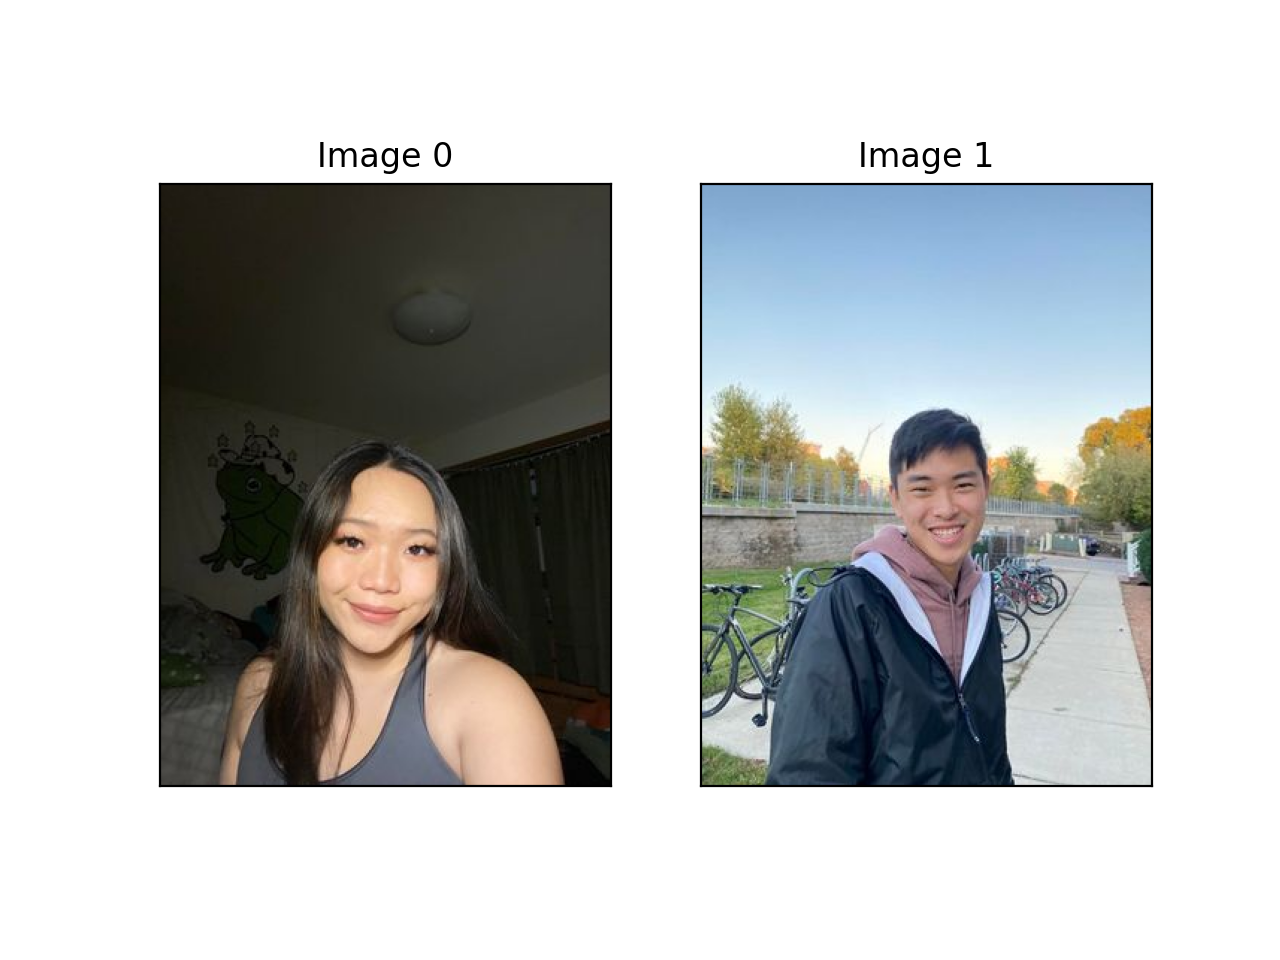

array([<AxesSubplot:title={'center':'Image 0'}>,
       <AxesSubplot:title={'center':'Image 1'}>], dtype=object)

In [2]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

import utils

%matplotlib notebook  
import matplotlib.pyplot as plt

lowIm_file = 'Ryan.jpg'
hiIm_file = 'alex2.jpg'


showImg([cv2.cvtColor(cv2.imread('Alex.jpg', 1),cv2.COLOR_BGR2RGB)
, cv2.cvtColor(cv2.imread('Ryan.jpg', 1),cv2.COLOR_BGR2RGB)
])

## Report: These are the original images I used

<IPython.core.display.Javascript object>


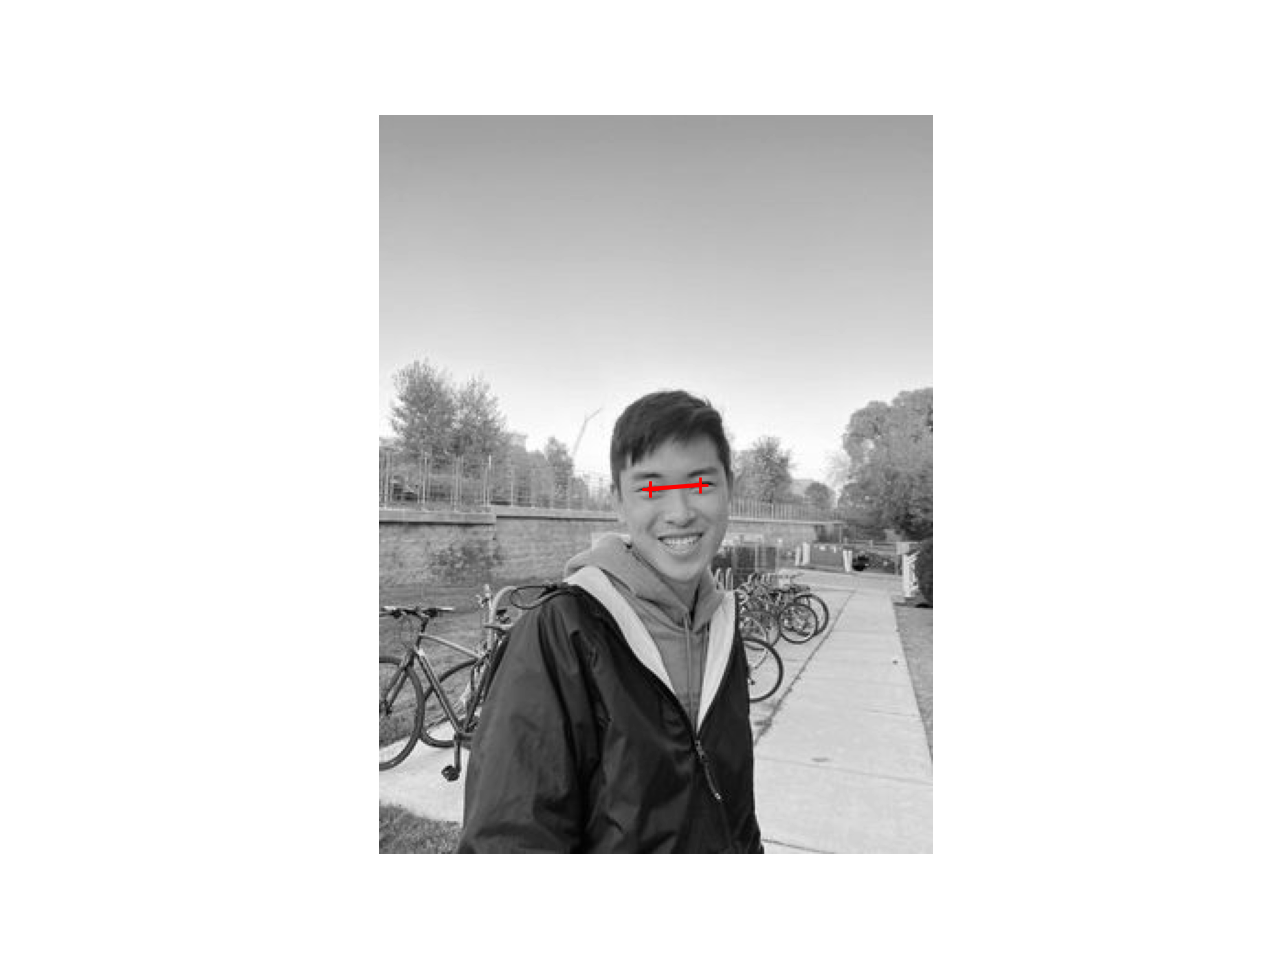

<IPython.core.display.Javascript object>


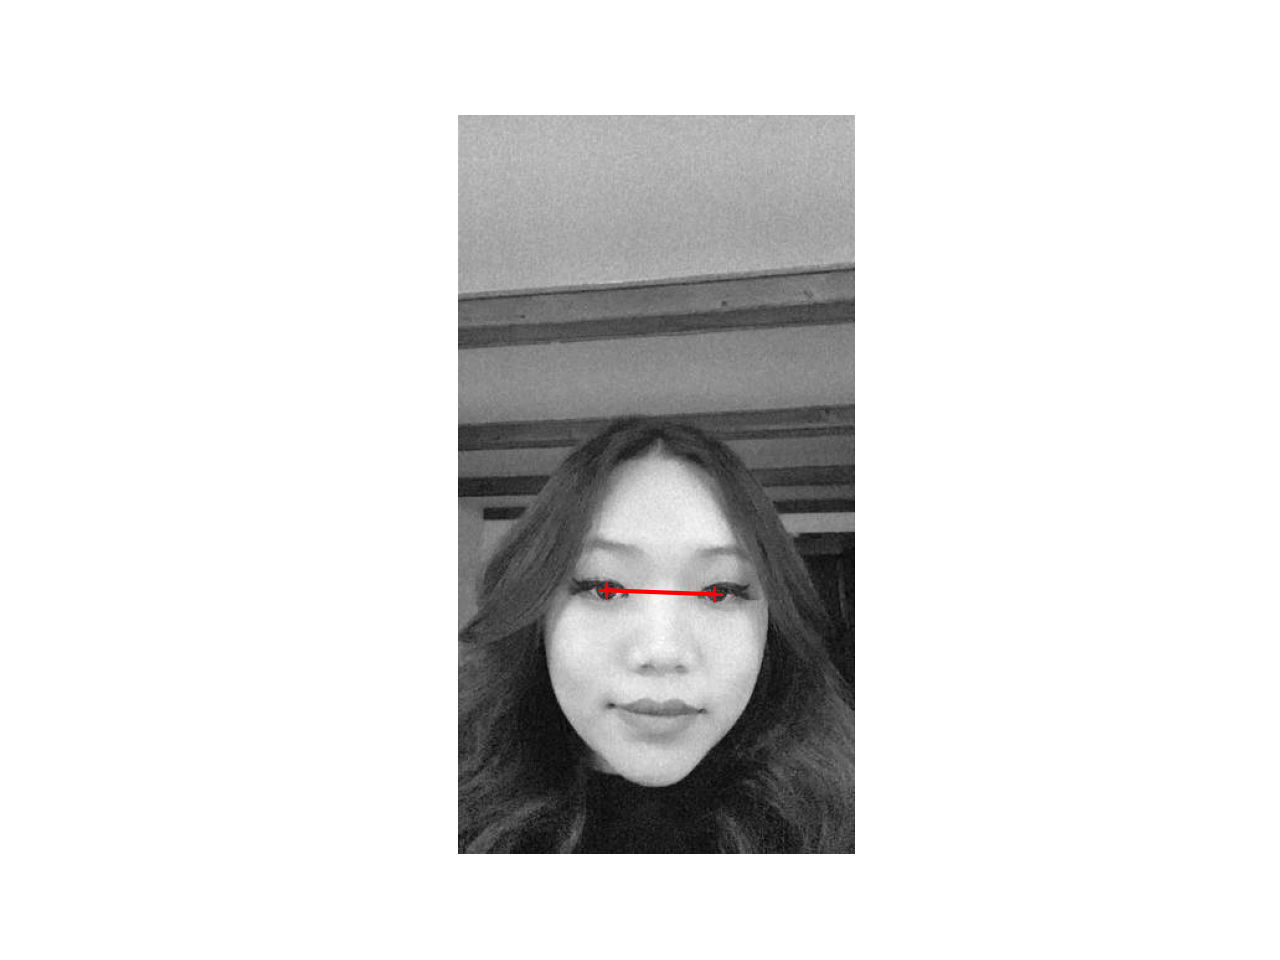

In [3]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

import utils

%matplotlib notebook  
import matplotlib.pyplot as plt

lowIm_file = 'Ryan.jpg'
hiIm_file = 'alex2.jpg'

lowIm = np.float32(cv2.imread(lowIm_file, cv2.IMREAD_GRAYSCALE) / 255.0)
hiIm = np.float32(cv2.imread(hiIm_file, cv2.IMREAD_GRAYSCALE) / 255.0)

pts_im1 = utils.prompt_eye_selection(lowIm)

pts_im2 = utils.prompt_eye_selection(hiIm)

<IPython.core.display.Javascript object>


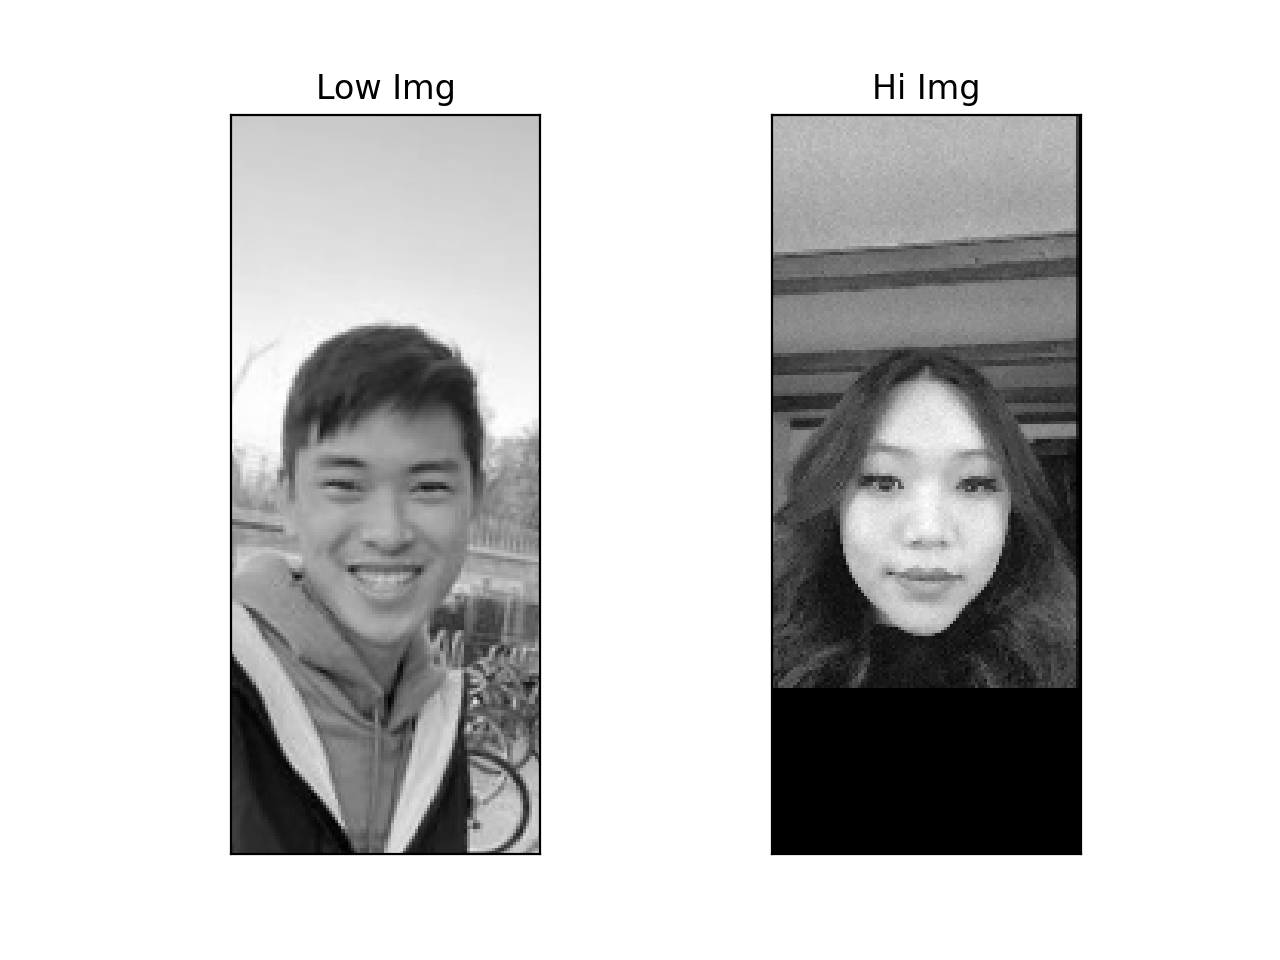

In [4]:
lowIm, hiIm = utils.align_images(lowIm_file, hiIm_file,pts_im1,pts_im2,save_images=False)

# convert to grayscale
lowIm = cv2.cvtColor(lowIm, cv2.COLOR_BGR2GRAY) / 255.0
hiIm = cv2.cvtColor(hiIm, cv2.COLOR_BGR2GRAY) / 255.0

#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(lowIm,cmap='gray')
axes[0].set_title('Low Img'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(hiIm,cmap='gray')
axes[1].set_title('Hi Img'), axes[1].set_xticks([]), axes[1].set_yticks([]);

# Testing

## Report: Inorder to test different sigma values, I created an array of increasing difference and applied these respective sigmas to my hybrid function

<IPython.core.display.Javascript object>


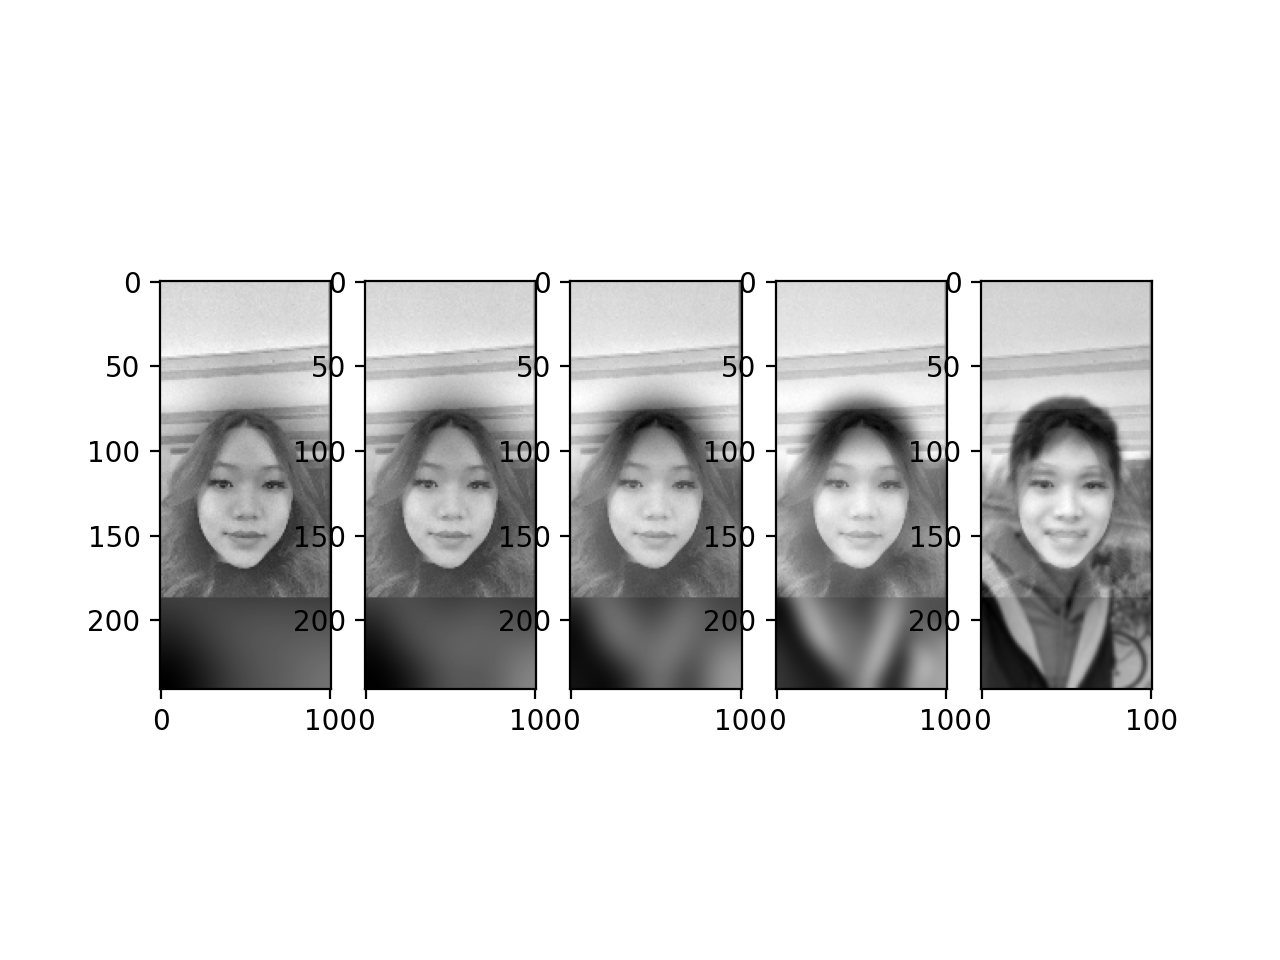

In [5]:
# MY CODE: SIGMA TEST
def imgTester(im1, im2):
    lowSigs = [20, 15, 10, 5, 1]
    hiSigs = [20, 25, 30, 35, 50]
    fig, axes = plt.subplots(1, len(lowSigs))
    for i in range(len(lowSigs)):
        sigma_low = lowSigs[i]
        sigma_high = hiSigs[i]
        im_hybrid = hybridImage(im1, im2, sigma_low, sigma_high)
        axes[i].imshow(im_hybrid,cmap='gray')
imgTester(lowIm, hiIm)

# Generate Hybrid

<IPython.core.display.Javascript object>


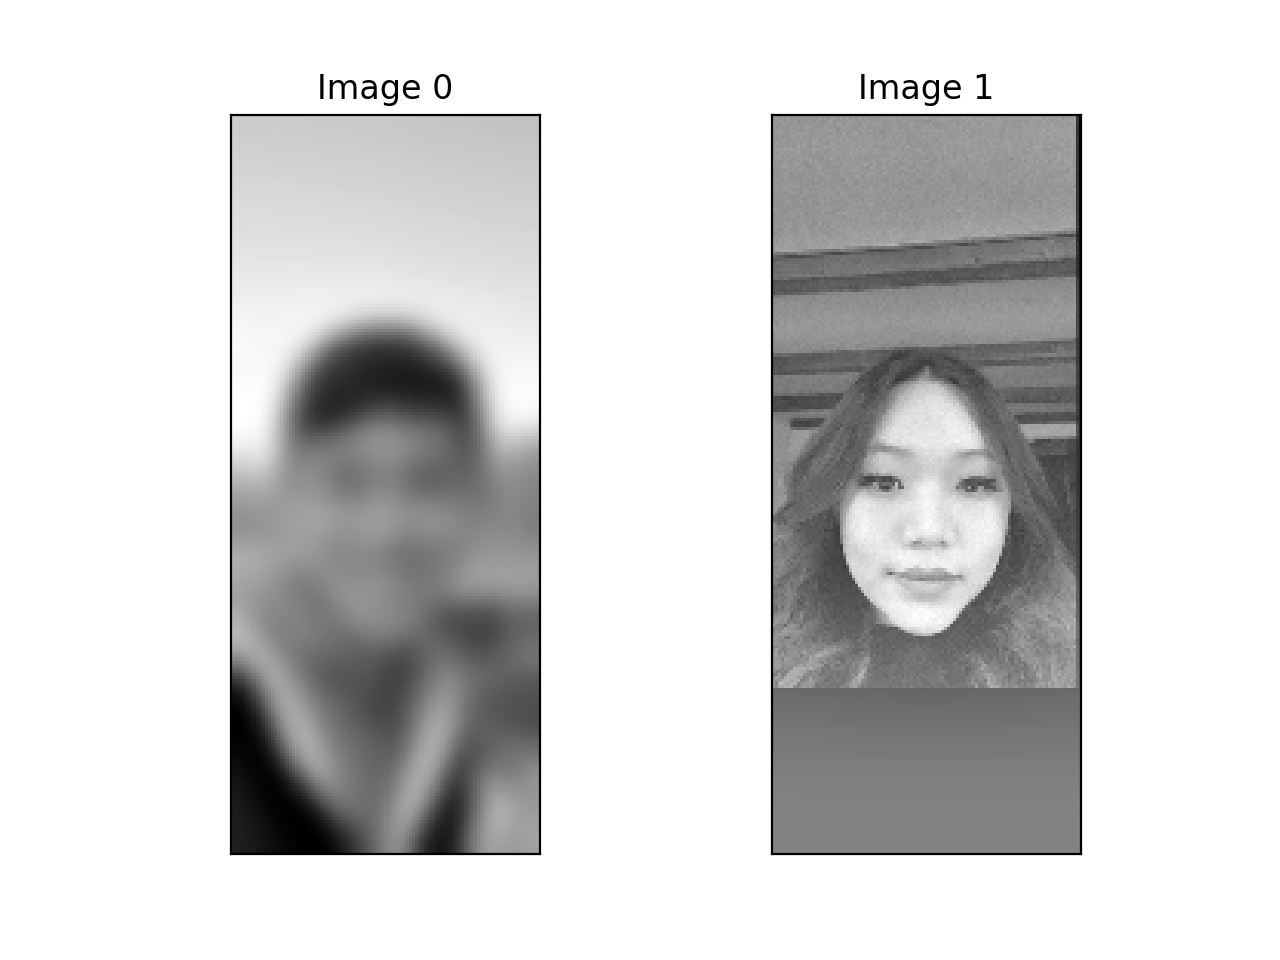

array([<AxesSubplot:title={'center':'Image 0'}>,
       <AxesSubplot:title={'center':'Image 1'}>], dtype=object)

In [6]:
mySigLow = 5
mySigHigh = 30
lowImgRes = lowPass(lowIm, mySigLow)
hiImgRes = hiPass(hiIm, mySigHigh)
showImg([lowImgRes, hiImgRes])

## Report: these are my images after filtering

<IPython.core.display.Javascript object>


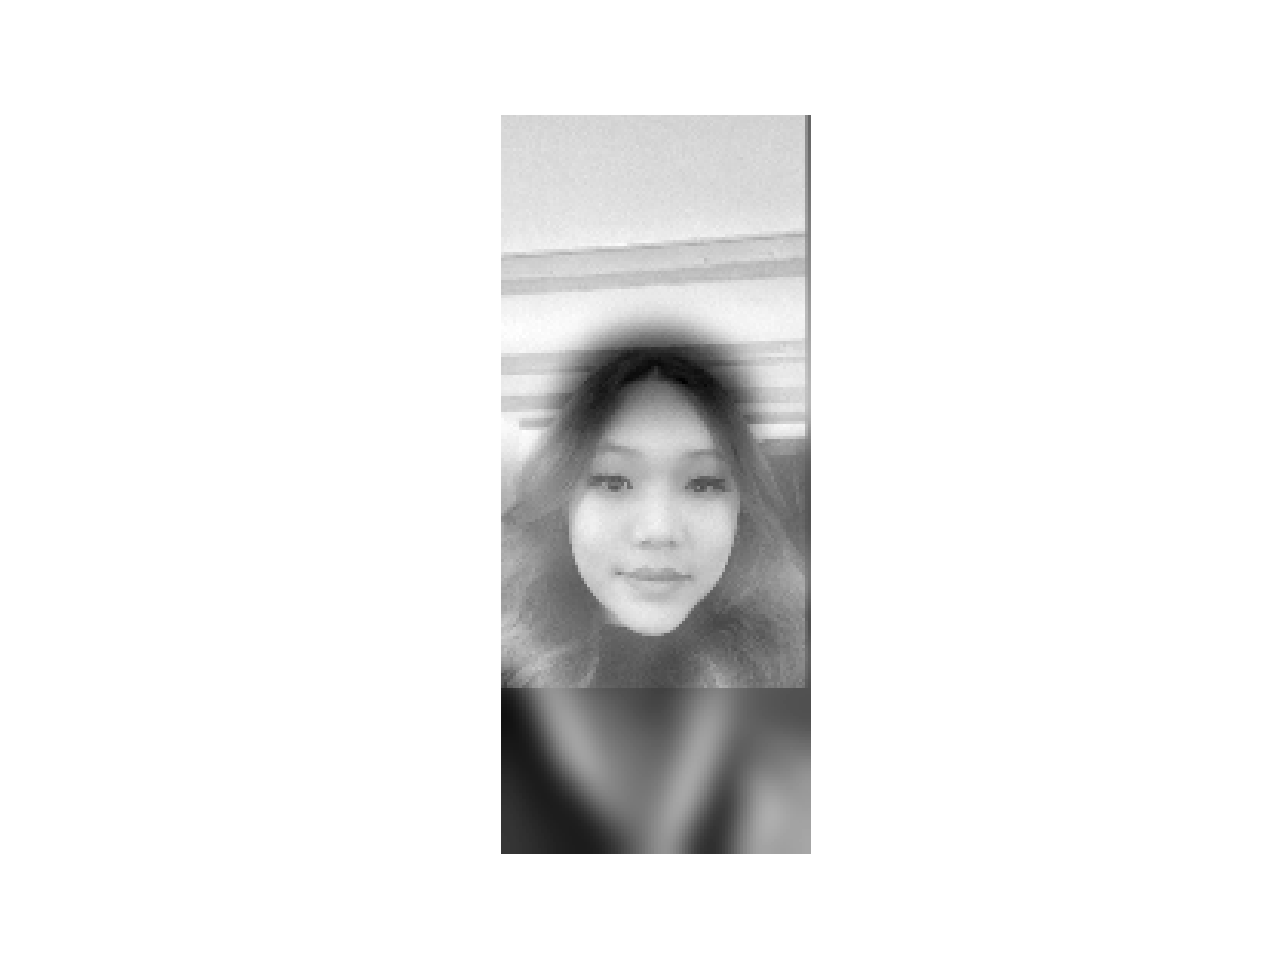

In [7]:
mySigLow = 5
mySigHigh = 30
im_hybrid = hybridImage(lowIm, hiIm, mySigLow, mySigHigh)
showImg(im_hybrid)

## Report: extra hybrids

<IPython.core.display.Javascript object>


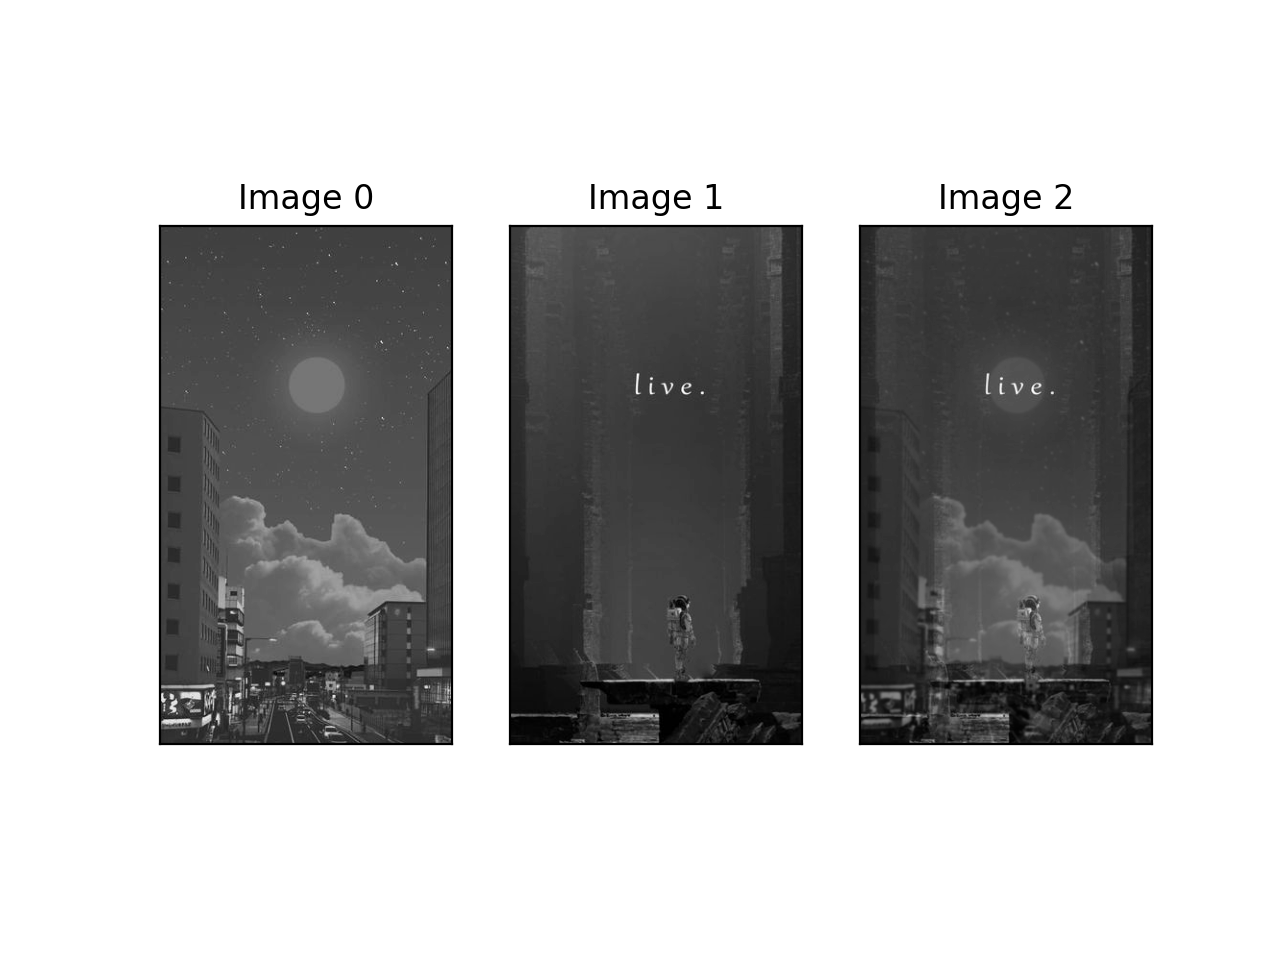

array([<AxesSubplot:title={'center':'Image 0'}>,
       <AxesSubplot:title={'center':'Image 1'}>,
       <AxesSubplot:title={'center':'Image 2'}>], dtype=object)

In [18]:
mySigLow = 1
mySigHigh = 100
back1 = np.float32(cv2.imread("background1.jpg", cv2.IMREAD_GRAYSCALE) / 255.0)
back2 = np.float32(cv2.imread("background2.jpg", cv2.IMREAD_GRAYSCALE) / 255.0)

im_hybrid = hybridImage(back1, back2, mySigLow, mySigHigh)
showImg([back1, back2, im_hybrid])

<IPython.core.display.Javascript object>


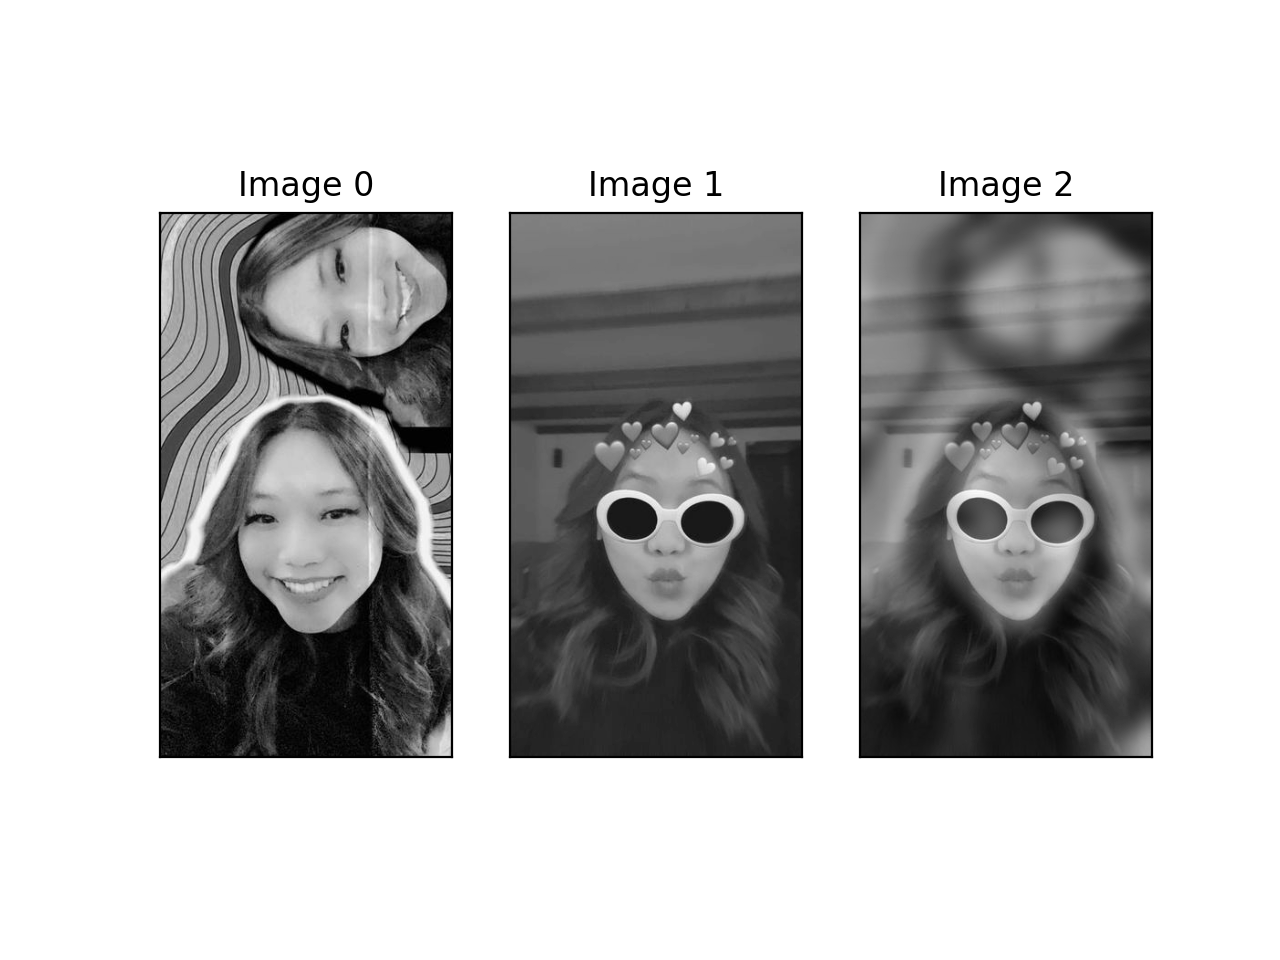

array([<AxesSubplot:title={'center':'Image 0'}>,
       <AxesSubplot:title={'center':'Image 1'}>,
       <AxesSubplot:title={'center':'Image 2'}>], dtype=object)

In [20]:
mySigLow = 10
mySigHigh = 20
back1 = np.float32(cv2.imread("alexRain.jpg", cv2.IMREAD_GRAYSCALE) / 255.0)
back2 = np.float32(cv2.imread("alexHeart.jpg", cv2.IMREAD_GRAYSCALE) / 255.0)

im_hybrid = hybridImage(back1, back2, mySigLow, mySigHigh)
showImg([back1, back2, im_hybrid])

## Report: Above is my hybrid image and bellow is the gray scale frequency analysis of each component of the hybrid

<IPython.core.display.Javascript object>


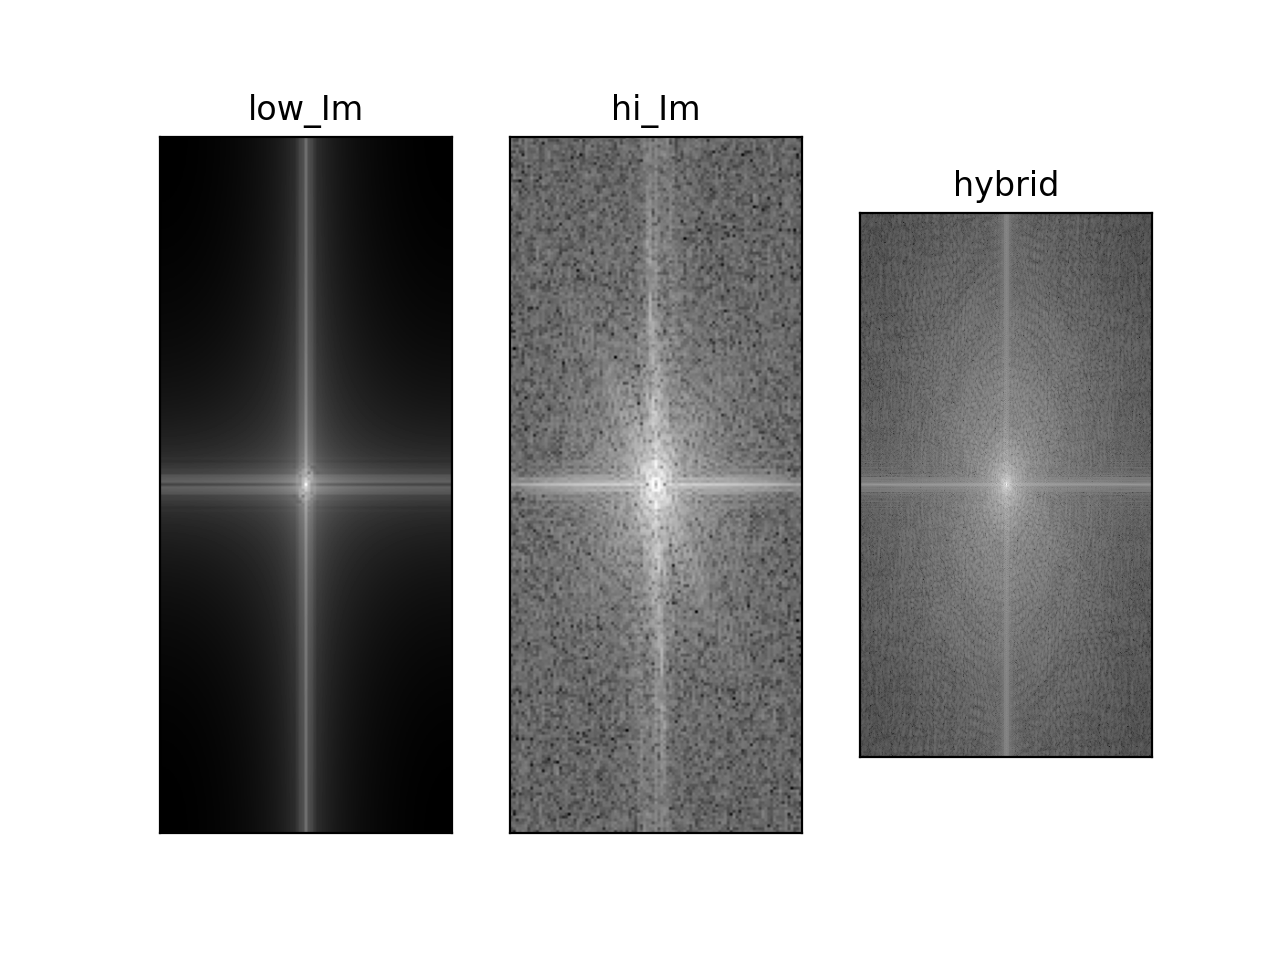

In [21]:
im1Fourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(lowPass(lowIm, mySigLow)))))
im2Fourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(hiPass(hiIm, mySigHigh)))))
hybridFourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid))))
fourierAxes = showImg([im1Fourier, im2Fourier, hybridFourier])
label(fourierAxes, ["low_Im", "hi_Im", "hybrid"])

### Part II: Image Enhancement
##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

### Report: I choose Gamma correction since the formula seemed fairly straight forward. Each pixel is normalized, exponentiated to the inverse of the given gamma value, then multiplied by 255 to return to the grayscale color space. 

<IPython.core.display.Javascript object>


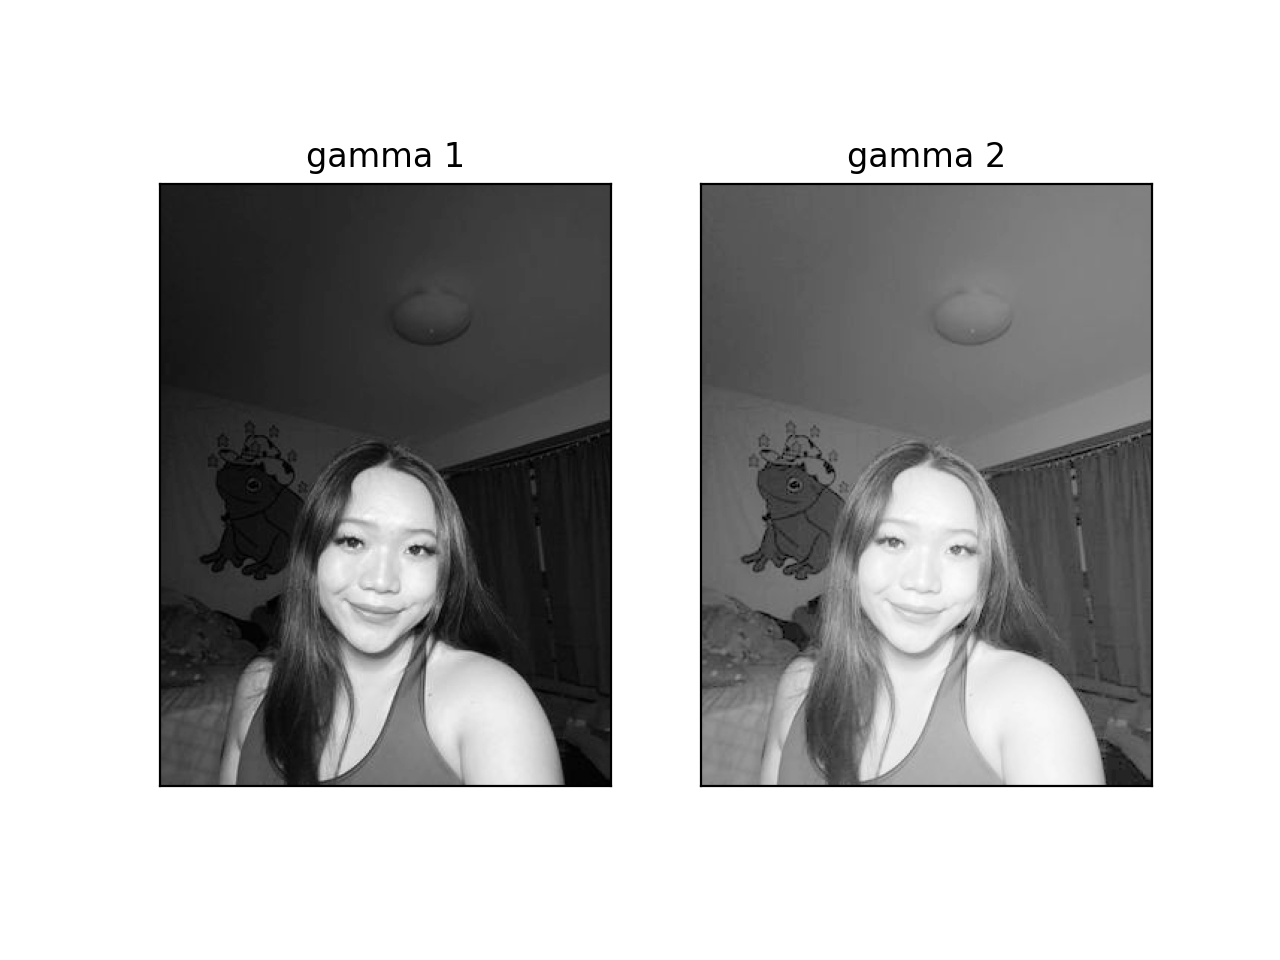

In [22]:
# gamma = 1.5
# im = np.float32(cv2.imread('DerekPicture.jpg', cv2.IMREAD_GRAYSCALE) / 255.0)

gammas = [1, 2]
img = cv2.imread('Alex.jpg', 0)
imgs = []
lables = ["gamma 1", "gamma 2"]
for gamma in gammas:
    scaledIm = ((img/255) ** (1/gamma)) * 255
    imgs.append(scaledIm)
gammaAxes = showImg(imgs)
label(gammaAxes, lables)

#### Color enhancement 

I first split the image into HSV. From there, my intuition was that color enhancment would most likely not involve changing the hue. Through experimentation, found that saturation had the most impact so I began multiplying the saturation value with a flat scalar. This created weird grey spots which I attributed to values extending outside the 0 to 255 bounds, so I decided to use my gamma correction contrast formula instead. From here I found that the gamma correction formula changed the type of my numpy array so i recasted it to unit8 inorder to remerge the hsv values then produce the high contrast image. Finally I converted the HSV to RGB to print out the images.



uint8
uint8


<IPython.core.display.Javascript object>


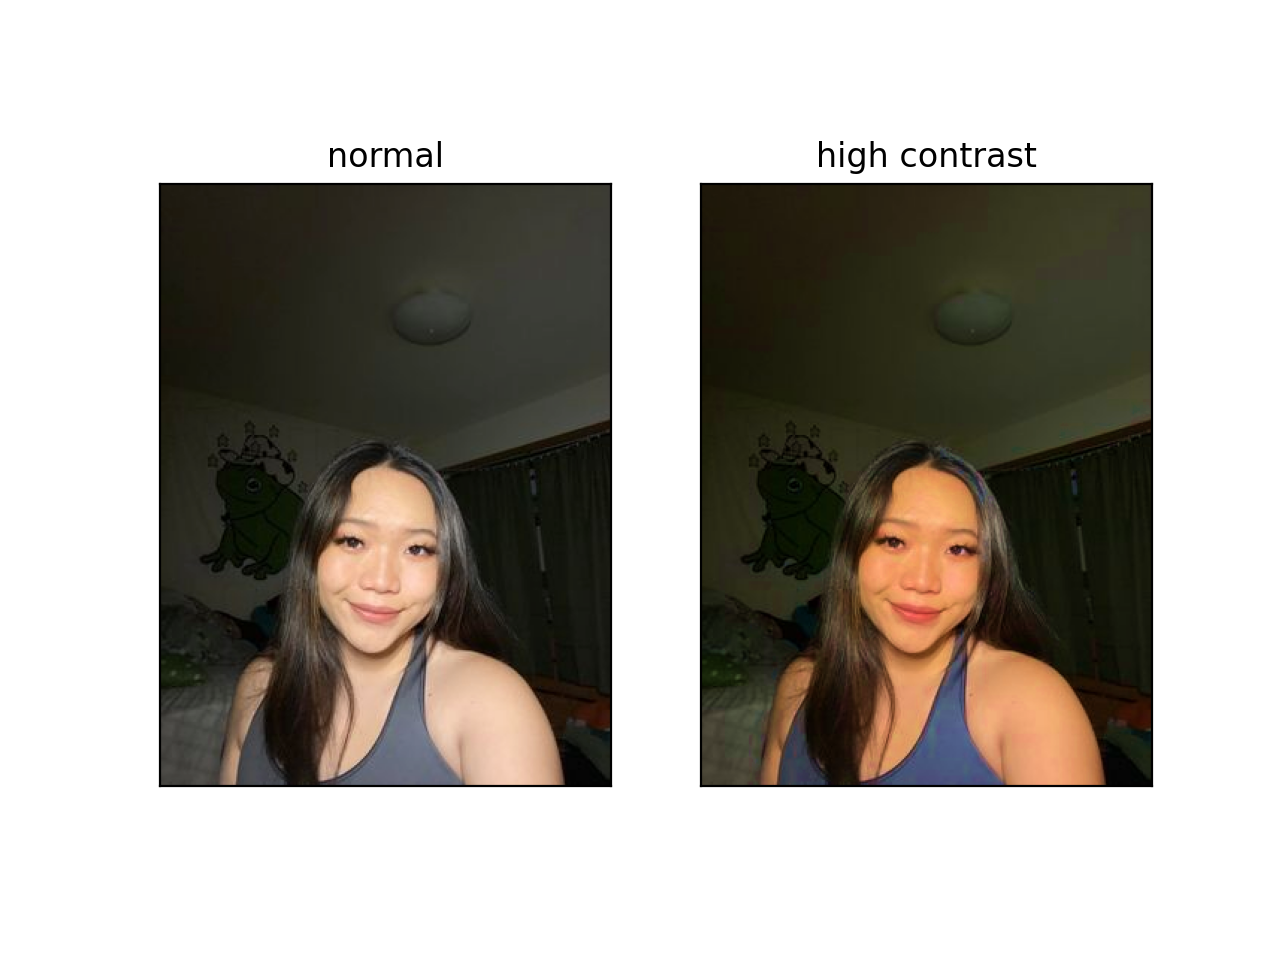

In [23]:
import copy

img = cv2.imread('Alex.jpg', 1)
def colorEnhance(gamma, hsv):
    h, s, v = cv2.split(hsv)
    sTemp = copy.deepcopy(s)

    s = (((s/255) ** (1/gamma)) * 255).astype(np.uint8)
#     for row in range(len(s)):
#         for col in range(len(s[0])):
#             if s[row,col] >= 255:
#                 print(s[row,col])
    print(s.dtype)
    print(sTemp.dtype)
    revised = cv2.merge([h, s, v])
    return revised

def HSV2RGB(hsv):
    return cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
revised = colorEnhance(2, hsv)

gammaAxes = showImg([HSV2RGB(hsv), HSV2RGB(revised)])
conLabels = ["normal", "high contrast"]
label(gammaAxes, conLabels)


#### Color shift

For the color shift I used the Lab color space inorder to seperate colors from illumination. From here I increased the a value (more red then green) for the red image and decreased the b value (more blue then yellow) for the blue (less yellow) image by. 

<IPython.core.display.Javascript object>


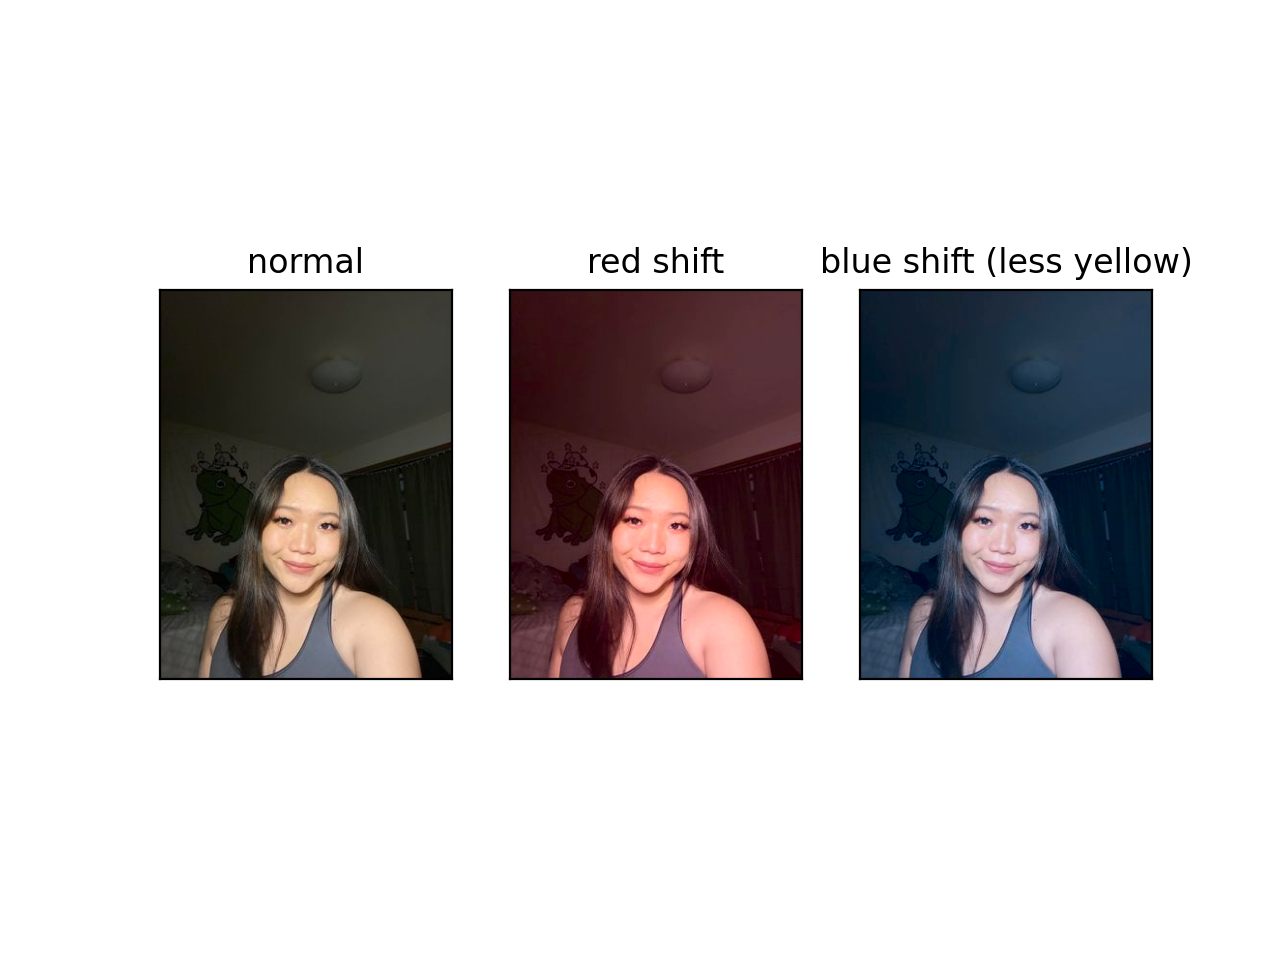

In [24]:
img = cv2.imread('Alex.jpg', 1)
L, a, b = cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2Lab))

aRed = a+20
bYellow = b-20

imgRed = cv2.merge([L, aRed, b])
imgYellow = cv2.merge([L, a, bYellow])
imgs = [cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cv2.cvtColor(imgRed,cv2.COLOR_Lab2RGB), cv2.cvtColor(imgYellow,cv2.COLOR_Lab2RGB)]
axes = showImg(imgs)
shiftLabels = ["normal", "red shift", "blue shift (less yellow)"]
label(axes, shiftLabels)


# Bells and Whistles 

hybrid with color

In [25]:
mySigLow = 15
mySigHigh = 25
im_hybrid = hybridImage( cv2.cvtColor(hiIm,cv2.COLOR_BGR2RGB) , cv2.cvtColor(lowIm,cv2.COLOR_BGR2RGB), mySigLow, mySigHigh)
showImg(im_hybrid)

error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xa96199bf::Set<3,4,-1>,struct cv::impl::A0xa96199bf::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [27]:
def readRGB(img):
     return cv2.cvtColor(np.float32(cv2.imread(img, 1) / 255.0), cv2.COLOR_BGR2RGB)

def findPoints(lowIm_file, hiIm_file):
    lowIm = cv2.cvtColor(np.float32(cv2.imread(lowIm_file, 1) / 255.0), cv2.COLOR_BGR2RGB)
    hiIm = cv2.cvtColor(np.float32(cv2.imread(hiIm_file, 1) / 255.0), cv2.COLOR_BGR2RGB)

    pts_imLow = utils.prompt_eye_selection(lowIm)
    pts_imHi = utils.prompt_eye_selection(hiIm)
    return pts_imLow, pts_imHi

def align(lowIm_file, hiIm_file, pts_imLow, pts_imHi):
    lowIm = readRGB(lowIm_file)
    hiIm = readRGB(hiIm_file)
    pts_imLow = utils.prompt_eye_selection(lowIm)
    pts_imHi = utils.prompt_eye_selection(hiIm)
    
    lowIm, hiIm = utils.align_images(lowIm_file, hiIm_file,pts_imLow,pts_imHi,save_images=False)
    return lowIm, hiIm

def lowPass(im, sigma):
    lowKern = utils.gaussian_kernel(sigma, 3*sigma)
    filt = cv2.filter2D(src=im, ddepth=-1, kernel=lowKern)
    return filt

def hiPass(im, sigma):
    hiKern = utils.gaussian_kernel(sigma, 3*sigma)
    filt = im - cv2.filter2D(src=im, ddepth=-1, kernel=hiKern)
    return filt

def hybridImage(imLow, imHi, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  
#     hiKernImg = im2
#     lowKern = utils.gaussian_kernel(sigma_low, 3*sigma_low)
#     hiKern = utils.gaussian_kernel(sigma_high, 3*sigma_high)
#     im1Filt = cv2.filter2D(src=im1, ddepth=-1, kernel=lowKern)
#     im2Filt = im2 - cv2.filter2D(src=im2, ddepth=-1, kernel=hiKern)
    lowFilt = lowPass(imLow, sigma_low)
    hiFilt = hiPass(imHi, sigma_high)
    return lowFilt + hiFilt

# MY CODE: TEST IMAGES
def showImg(img):
    if isinstance(img, list):
        fig, axes = plt.subplots(1, len(img))
        for i in range(len(img)):
            axes[i].imshow(img[i], cmap='gray')
            axes[i].set_title('Image ' + str(i)), axes[i].set_xticks([]), axes[i].set_yticks([])
        return axes
    
    else:
        fig = plt.figure()
        plt.imshow(img, cmap='gray')
        plt.axis('off')

def label(axes, labels):
    for i in range(len(labels)):
        axes[i].set_title(labels[i])
    
    
    
    
lowIm_file = ''
hiIm_file = ''

pts_imLow, pts_imHi = findPoints(lowIm_file, hiIm_file)

# mySigLow = 15
# mySigHigh = 25
# im_hybrid = hybridImage(hiIm, lowIm, mySigLow, mySigHigh)

# pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# # plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [28]:
lowIm, hiIm = align(lowIm_file, hiIm_file, pts_imLow, pts_imHi)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'